# Chapter 4: Annotate transcriptional components

<br>
<div>
    <img src="../media/method_chap3.png" width=2144 height=1041>
</div>

### Analysis overview
In this chapter we perform a detailed analysis of the KRAS transcriptional components produced by the NMF decomposition in chapter 3 in order to assign a biological interpretation to each component. 

The analysis consists of the following steps:
* Define a target profile for each component in the CCLE Reference Dataset using the amplitudes of the $H$ matrix. This matrix represents the magnitude of each NMF component per sample. 
* Using the Information Coefficient (IC) ([*Kim, J.W., Botvinnik 2016*](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4868596/)) to estimate the degree of association of each component target profile and several types of genomic features.

The genomic features include the following (see [chapter 1](1 Set up data) for sources):

1. **Mutations and Copy Number Alterations (CNA)** CCLE mutation and copy number datasets ([*Barretina et al. 2012*](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3320027/)).
2.	 **Gene expression**  CCLE RNA Seq dataset ([*Barretina et al. 2012*](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3320027/)).
3.	  **Pathway expression** (single sample GSEA of MSigDB gene sets) MSigDB v5.1 sub-collections c2, c5, c6 and h (Liberzon et al. 2011; [*Liberzon et al. 2016. Cell Systems, 1(6), pp.417–425.*](https://www.ncbi.nlm.nih.gov/pubmed/26771021). and a few additional gene sets (see supplementary information in the article).
4.	**Transcription factors and master regulators expression** (single sample GSEA of gene sets) MSigDB v5.1, ([*Liberzon et al. 2011*](https://www.ncbi.nlm.nih.gov/pubmed/21546393)), sub-collection c3 and 1,598 [IPA gene sets](http://www.ingenuity.com).
5.	 **Protein expression** CCLE Reverse Phased Protein Array (RPPA) dataset ([*Barretina et al. 2012*](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3320027/)).
6.	 **Drug sensitivity** CCLE dataset ([*Barretina et al. 2012*](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3320027/))
7.	**Gene dependency** RNAi Achilles dataset, ([*Cowley et al. 2014*](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4432652/)).

### 1. Set up notebook and import [CCAL](https://github.com/KwatME/ccal)

In [ ]:
from notebook_environment import *

%load_ext autoreload
%autoreload 2
%matplotlib inline

### 2. Read H matrix and CCLE object

In [ ]:
h_matrix = pd.read_table('../results/nmfccs/nmf_k9_h.txt', index_col=0)

In [ ]:
with gzip.open('../data/ccle.pickle.gz') as f:
    CCLE = pickle.load(f)

### 3. Find the top matching genomic features for each component profile
The annotation runs the association analysis for each component against all the genomic datasets. Because this a double iteration over componets and feature datasets, it will take hours to complete. As the program runs, it will display the specific target vs. features comparison being made.

In [ ]:
for i, component in h_matrix.iterrows():

    for features_name, d in CCLE.items():

        features_ = d['df']
        emphasis = d['emphasis']
        data_type = d['data_type']

        print('Annotating with {} (emphasis={} & data_type={})'.format(
            features_name, emphasis, data_type))

#         ccal.make_match_panel(
#             component,
#             features_,
#             n_jobs=28,
#             n_features=20,
#             n_samplings=0,
#             n_permutations=0,
#             scores_ascending=[True, False][emphasis == 'high'],
#             features_type=data_type,
#             title=features_name,
#             file_path_prefix='../results/match_components/match_{}_and_{}'.
#             format(i, features_name))

#         mpl.pyplot.show()

### 4. Make summary panels for selected component associations

Here we will select specific sets of top scoring features of particular biological interest for many of the components.

#### 4.1 Component C3
The results of the association analysis below shows that component C3 is the most associated with KRAS mutation status. As can be seen below in addition to KRAS mutation status, C3 is also associated with a KRAS dependency signature and with a profile of KRAS RNAi dependency from Project Achilles. These findings suggest that the transcriptional activity of KRAS represented by C3 underlies the KRAS dependence phenotype [*Singh et al. 2009*](https://www.ncbi.nlm.nih.gov/pubmed/19690457) and helps to explain the fact that KRAS mutant cancers with low C3 scores, i.e., samples on the right side of the heatmap below do not depend on KRAS for their survival.

Making match panel for Mutation ...
Dropping 0 axis-1 slices ...
Computing match score with <function compute_information_coefficient at 0x113d4f9d8> (1 process) ...
Computing MoEs with 30 samplings ...
Computing p-values and FDRs with 30 permutations ...
	1/30 ...
	30/30 - done.
Making match panel for Gene Set ...
Dropping 0 axis-1 slices ...
Computing match score with <function compute_information_coefficient at 0x113d4f9d8> (1 process) ...


/Users/kazyra/Jumis/tools/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


Computing MoEs with 30 samplings ...
Computing p-values and FDRs with 30 permutations ...
	1/30 ...
	30/30 - done.
Making match panel for Gene Dependency (Achilles) ...
Dropping 0 axis-1 slices ...
Computing match score with <function compute_information_coefficient at 0x113d4f9d8> (1 process) ...
Computing MoEs with 30 samplings ...
Computing p-values and FDRs with 30 permutations ...
	1/30 ...
	30/30 - done.


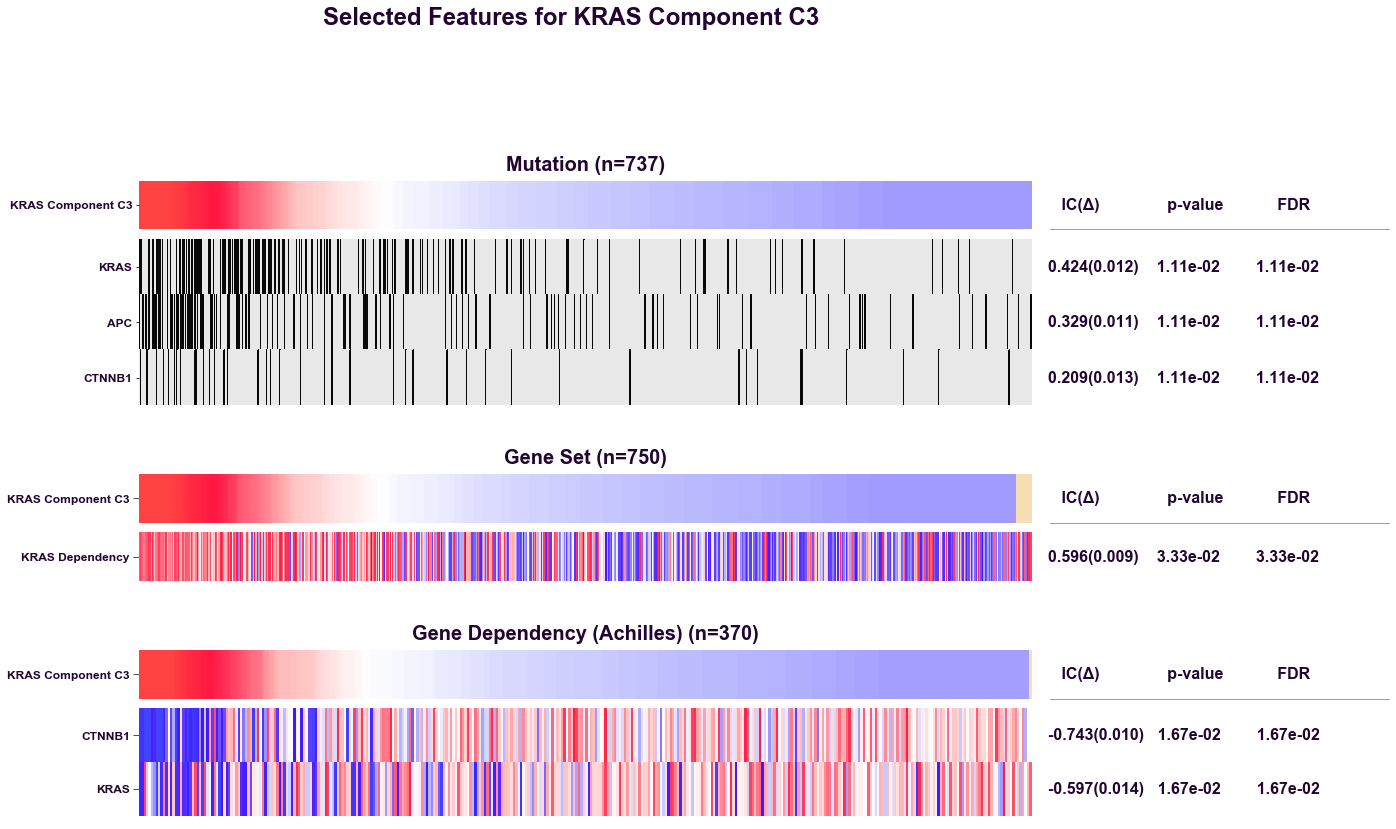

In [7]:
# Select component
component = 'C3'
target = h_matrix.loc[component, :]
target.name = 'KRAS Component {}'.format(component)

# Set up multiple features
CCLE['Mutation']['indices'] = ['KRAS_MUT', 'APC_MUT', 'CTNNB1_MUT']
CCLE['Mutation']['index_aliases'] = ['KRAS', 'APC', 'CTNNB1']

CCLE['Gene Set']['indices'] = ['SINGH_KRAS_DEPENDENCY_SIGNATURE_']
CCLE['Gene Set']['index_aliases'] = ['KRAS Dependency']

CCLE['Gene Dependency (Achilles)']['indices'] = ['KRAS', 'CTNNB1']
CCLE['Gene Dependency (Achilles)']['index_aliases'] = ['KRAS', 'CTNNB1']

multiple_features = OrderedDict({
    k: CCLE[k]
    for k in ['Mutation', 'Gene Set', 'Gene Dependency (Achilles)']
})

# Make summary match panel
ccal.make_summary_match_panel(
    target,
    multiple_features,
    title='Selected Features for {}'.format(target.name),
    file_path='../results/match_components/{}.summary_match_panel.png'.format(
        target.name))

#### 4.2  Component C6

Component C6 is associated with other known alteration downstream of KRAS, the BRAF/MAPK pathway.  In this case, BRAF mutation status was the top hit associated with component C6 out of 37,276 genomic alterations. As can be seen below the component is also strongly associated with BRAF V600E and ETV1 activation signatures. ETV1 is a well-established transcription factor, downstream of the MAPK pathway, and further suggests that C6 indeed reflects a transcriptional program associated with MAPK activation. The heatmap below also shows the association of the component with the sensitivity profiles for 3 MAPK pathway inhibitors (PLX4720, PD318088 and selumetinib).

Making match panel for Mutation ...
Dropping 0 axis-1 slices ...
Computing match score with <function compute_information_coefficient at 0x113d4f9d8> (1 process) ...
Computing MoEs with 30 samplings ...
Computing p-values and FDRs with 30 permutations ...
	1/30 ...
	30/30 - done.
Making match panel for Gene Set ...
Dropping 0 axis-1 slices ...
Computing match score with <function compute_information_coefficient at 0x113d4f9d8> (1 process) ...


/Users/kazyra/Jumis/tools/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


Computing MoEs with 30 samplings ...
Computing p-values and FDRs with 30 permutations ...
	1/30 ...
	30/30 - done.
Making match panel for Drug Sensitivity (CTD^2) ...
Dropping 0 axis-1 slices ...
Computing match score with <function compute_information_coefficient at 0x113d4f9d8> (1 process) ...
Computing MoEs with 30 samplings ...
Computing p-values and FDRs with 30 permutations ...
	1/30 ...
	30/30 - done.


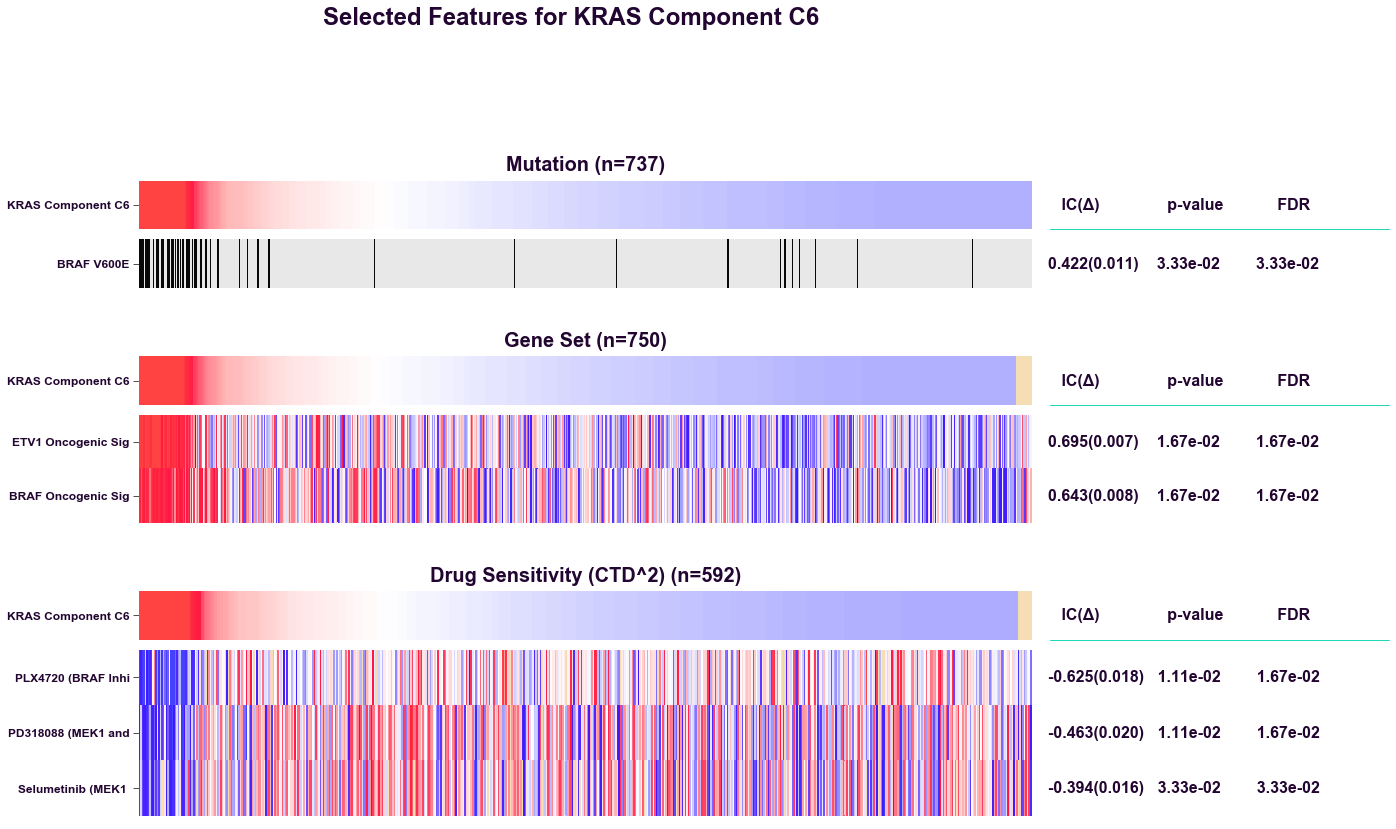

In [8]:
# Select component
component = 'C6'
target = h_matrix.loc[component, :]
target.name = 'KRAS Component {}'.format(component)

# Set up multiple features
CCLE['Mutation']['indices'] = ['BRAF.V600E_MUT']
CCLE['Mutation']['index_aliases'] = ['BRAF V600E']

CCLE['Gene Set']['indices'] = ['BRAF_UP', 'ETV1_UP']
CCLE['Gene Set']['index_aliases'] = [
    'BRAF Oncogenic Signature', 'ETV1 Oncogenic Signature'
]

CCLE['Drug Sensitivity (CTD^2)']['indices'] = [
    'PLX-4720', 'selumetinib', 'PD318088'
]
CCLE['Drug Sensitivity (CTD^2)']['index_aliases'] = [
    'PLX4720 (BRAF Inhibitor)', 'Selumetinib (MEK1 and MEK2 Inhibitor)',
    'PD318088 (MEK1 and MEK2 Inhibitor)'
]

multiple_features = OrderedDict(
    {k: CCLE[k]
     for k in ['Mutation', 'Gene Set', 'Drug Sensitivity (CTD^2)']})

# Make summary match panel
ccal.make_summary_match_panel(
    target,
    multiple_features,
    title='Selected Features for {}'.format(target.name),
    file_path='../results/match_components/{}.summary_match_panel.png'.format(
        target.name))

#### 4.3  Component C7

The component C7 is significantly associated with features representing NF-κB,  a well-established pathway downstream of KRAS. This is consistent with the results of our earlier studies of KRAS synthetic lethality ([*Barbie et al. 2009*](https://www.ncbi.nlm.nih.gov/pubmed/19847166)),and RAS-driven cytokine autocrine circuits ([*Zhu et al.* 2014](https://www.ncbi.nlm.nih.gov/pubmed/24444711)).


We show below the profiles of a gene set representing the NF-κB  motif,  an independent gene set representing p50/p65 and a profile of NF-κB protein expression. Among the genes most significantly associated with C7 was FOSL1 (FRA1) , a member of the AP-1 transcription factor family. We also observed high association of a gene set representing the targets of AP1 and the profile of the protein FRA1 pS265.

Making match panel for Gene Expression ...
Dropping 0 axis-1 slices ...
Computing match score with <function compute_information_coefficient at 0x113d4f9d8> (1 process) ...
Computing MoEs with 30 samplings ...
Computing p-values and FDRs with 30 permutations ...
	1/30 ...
	30/30 - done.
Making match panel for Gene Set ...
Dropping 0 axis-1 slices ...
Computing match score with <function compute_information_coefficient at 0x113d4f9d8> (1 process) ...


/Users/kazyra/Jumis/tools/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


Computing MoEs with 30 samplings ...
Computing p-values and FDRs with 30 permutations ...
	1/30 ...
	30/30 - done.
Making match panel for Regulator Gene Set ...
Dropping 0 axis-1 slices ...
Computing match score with <function compute_information_coefficient at 0x113d4f9d8> (1 process) ...
Computing MoEs with 30 samplings ...
Computing p-values and FDRs with 30 permutations ...
	1/30 ...
	30/30 - done.
Making match panel for Protein Expression ...
Dropping 0 axis-1 slices ...
Computing match score with <function compute_information_coefficient at 0x113d4f9d8> (1 process) ...
Computing MoEs with 30 samplings ...
Computing p-values and FDRs with 30 permutations ...
	1/30 ...
	30/30 - done.


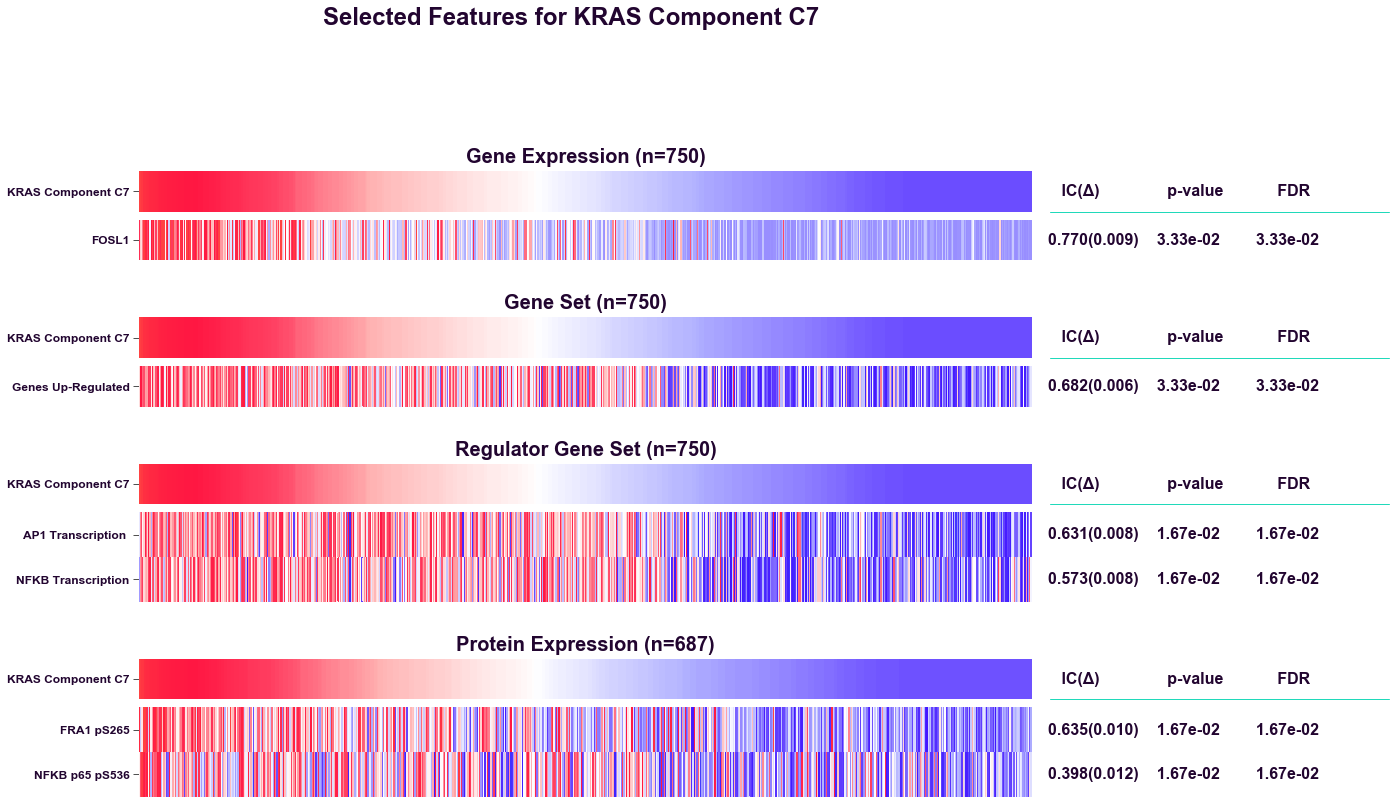

In [9]:
# Select component
component = 'C7'
target = h_matrix.loc[component, :]
target.name = 'KRAS Component {}'.format(component)

# Set up multiple features
CCLE['Gene Expression']['indices'] = ['FOSL1']
CCLE['Gene Expression']['index_aliases'] = ['FOSL1']

CCLE['Gene Set']['indices'] = ['HINATA_NFKB_TARGETS_FIBROBLAST_UP']
CCLE['Gene Set']['index_aliases'] = ['Genes Up-Regulated by p50 and p65']

CCLE['Regulator Gene Set']['indices'] = ['GGGNNTTTCC_V$NFKB_Q6_01', 'V$AP1_Q4']
CCLE['Regulator Gene Set']['index_aliases'] = [
    'NFKB Transcription Factor Targets', 'AP1 Transcription Factor Targets'
]

CCLE['Protein Expression']['indices'] = [
    'NF-kB-p65_pS536-R-C', 'FRA1_pS265-R-E'
]
CCLE['Protein Expression']['index_aliases'] = ['NFKB p65 pS536', 'FRA1 pS265']

multiple_features = OrderedDict({
    k: CCLE[k]
    for k in [
        'Gene Expression', 'Gene Set', 'Regulator Gene Set',
        'Protein Expression'
    ]
})

# Make summary match panel
ccal.make_summary_match_panel(
    target,
    multiple_features,
    title='Selected Features for {}'.format(target.name),
    file_path='../results/match_components/{}.summary_match_panel.png'.format(
        target.name))

#### 4.4  Component C4 

As can be seen below component C4 appears to be associated with ZEB1/EMT.

Making match panel for Gene Set ...
Dropping 0 axis-1 slices ...
Computing match score with <function compute_information_coefficient at 0x113d4f9d8> (1 process) ...
Computing MoEs with 30 samplings ...
Computing p-values and FDRs with 30 permutations ...
	1/30 ...
	30/30 - done.
Making match panel for Regulator Gene Set ...
Dropping 0 axis-1 slices ...
Computing match score with <function compute_information_coefficient at 0x113d4f9d8> (1 process) ...


/Users/kazyra/Jumis/tools/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


Computing MoEs with 30 samplings ...
Computing p-values and FDRs with 30 permutations ...
	1/30 ...
	30/30 - done.
Making match panel for Protein Expression ...
Dropping 0 axis-1 slices ...
Computing match score with <function compute_information_coefficient at 0x113d4f9d8> (1 process) ...
Computing MoEs with 30 samplings ...
Computing p-values and FDRs with 30 permutations ...
	1/30 ...
	30/30 - done.


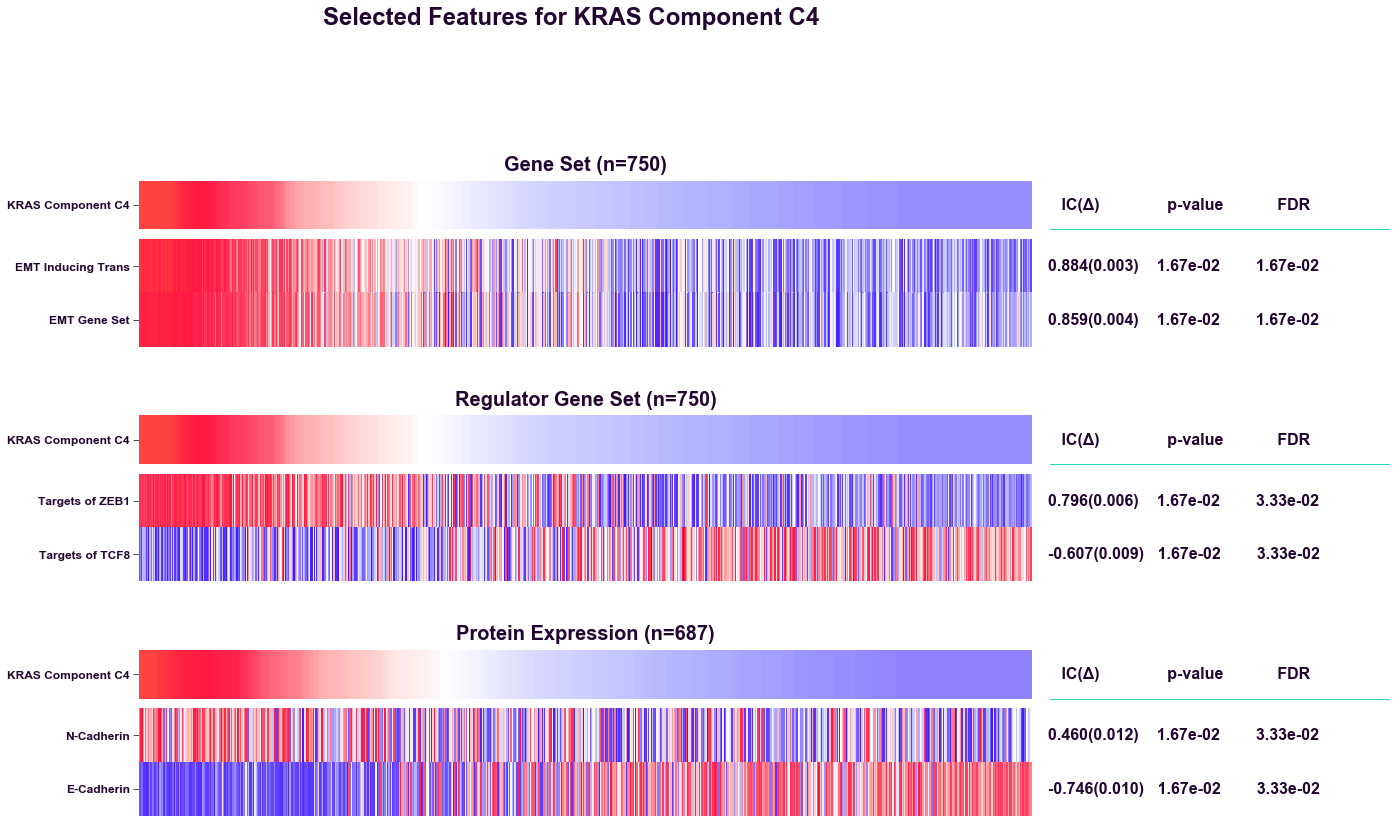

In [10]:
# Select component
component = 'C4'
target = h_matrix.loc[component, :]
target.name = 'KRAS Component {}'.format(component)

# Set up multiple features
CCLE['Gene Set']['indices'] = ['TAUBE_EMT_UP', 'GROGER_EMT_UP']
CCLE['Gene Set']['index_aliases'] = [
    'EMT Inducing Transcription Factors', 'EMT Gene Set'
]

CCLE['Regulator Gene Set']['indices'] = ['V$AREB6_03', 'IPA_ZEB1']
CCLE['Regulator Gene Set']['index_aliases'] = [
    'Targets of TCF8', 'Targets of ZEB1'
]

CCLE['Protein Expression']['indices'] = ['N-Cadherin-R-V', 'E-Cadherin-R-V']
CCLE['Protein Expression']['index_aliases'] = ['N-Cadherin', 'E-Cadherin']

multiple_features = OrderedDict({
    k: CCLE[k]
    for k in ['Gene Set', 'Regulator Gene Set', 'Protein Expression']
})

# Make summary match panel
ccal.make_summary_match_panel(
    target,
    multiple_features,
    title='Selected Features for {}'.format(target.name),
    file_path='../results/match_components/{}.summary_match_panel.png'.format(
        target.name))

#### 4.5  Component C2

Component C2 is associated with MYC/E2F activation.

Making match panel for Regulator Gene Set ...
Dropping 0 axis-1 slices ...
Computing match score with <function compute_information_coefficient at 0x113d4f9d8> (1 process) ...
Computing MoEs with 30 samplings ...
Computing p-values and FDRs with 30 permutations ...
	1/30 ...
	30/30 - done.


/Users/kazyra/Jumis/tools/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


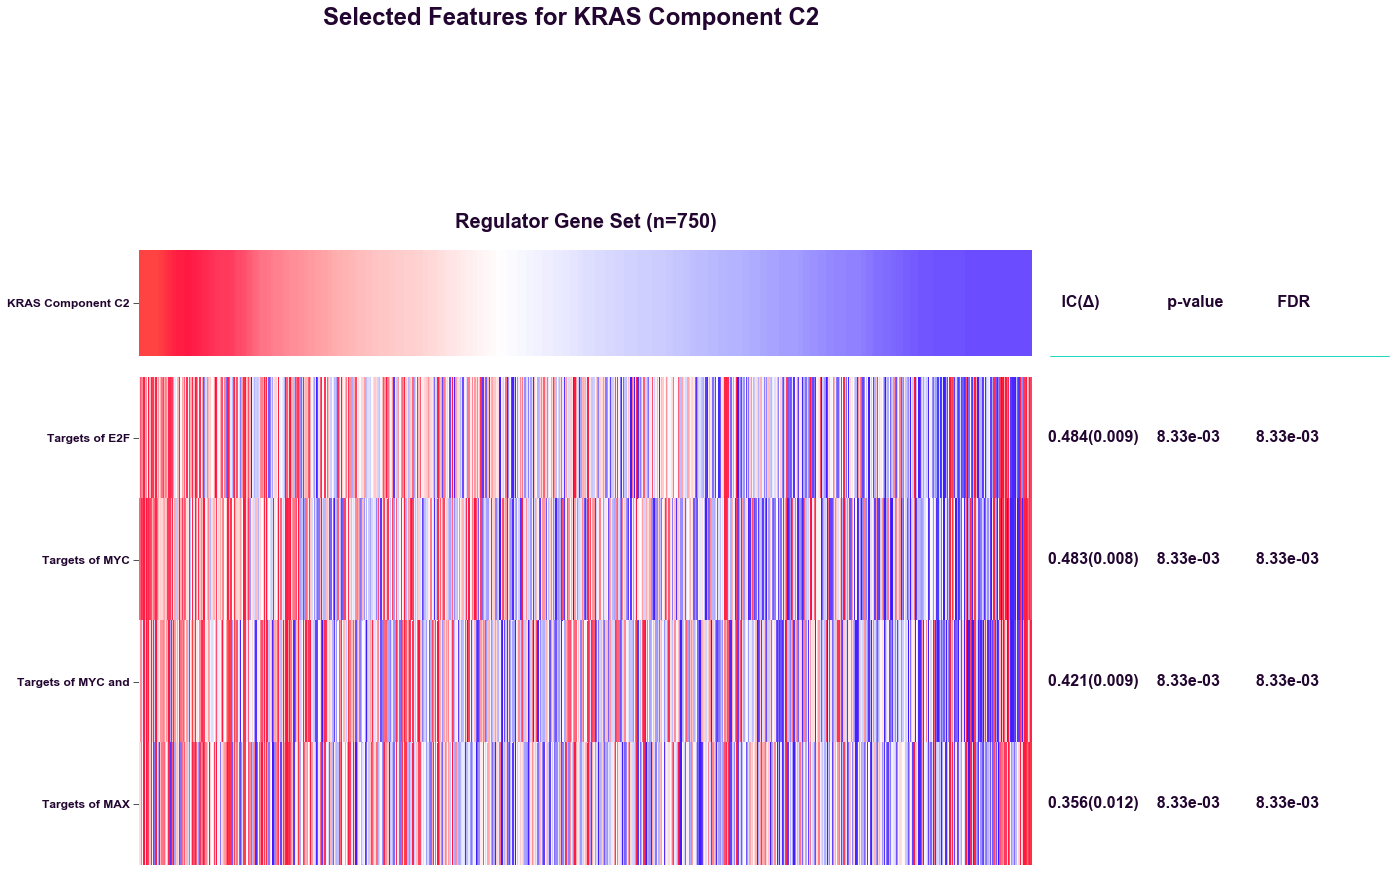

In [11]:
# Select component
component = 'C2'
target = h_matrix.loc[component, :]
target.name = 'KRAS Component {}'.format(component)

# Set up multiple features
CCLE['Regulator Gene Set']['indices'] = [
    'V$E2F_02', 'V$MAX_01', 'V$MYCMAX_01', 'IPA_MYC'
]

CCLE['Regulator Gene Set']['index_aliases'] = [
    'Targets of E2F', 'Targets of MAX', 'Targets of MYC and MAX',
    'Targets of MYC'
]

multiple_features = OrderedDict({k: CCLE[k] for k in ['Regulator Gene Set']})

# Make summary match panel
ccal.make_summary_match_panel(
    target,
    multiple_features,
    title='Selected Features for {}'.format(target.name),
    file_path='../results/match_components/{}.summary_match_panel.png'.format(
        target.name))

#### 4.6  Component C5

Component C5 is associated with patterns of overexpression and dependency of HNF1 and PAX8 across multiple cancer types including subsets of ovary [*Cheung et al. 2011*](https://www.ncbi.nlm.nih.gov/pubmed/21746896), kidney, endometrial and liver.

Making match panel for Gene Expression ...
Dropping 0 axis-1 slices ...
Computing match score with <function compute_information_coefficient at 0x113d4f9d8> (1 process) ...
Computing MoEs with 30 samplings ...
Computing p-values and FDRs with 30 permutations ...
	1/30 ...
	30/30 - done.
Making match panel for Gene Dependency (Achilles) ...
Dropping 0 axis-1 slices ...
Computing match score with <function compute_information_coefficient at 0x113d4f9d8> (1 process) ...


/Users/kazyra/Jumis/tools/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


Computing MoEs with 30 samplings ...
Computing p-values and FDRs with 30 permutations ...
	1/30 ...
	30/30 - done.


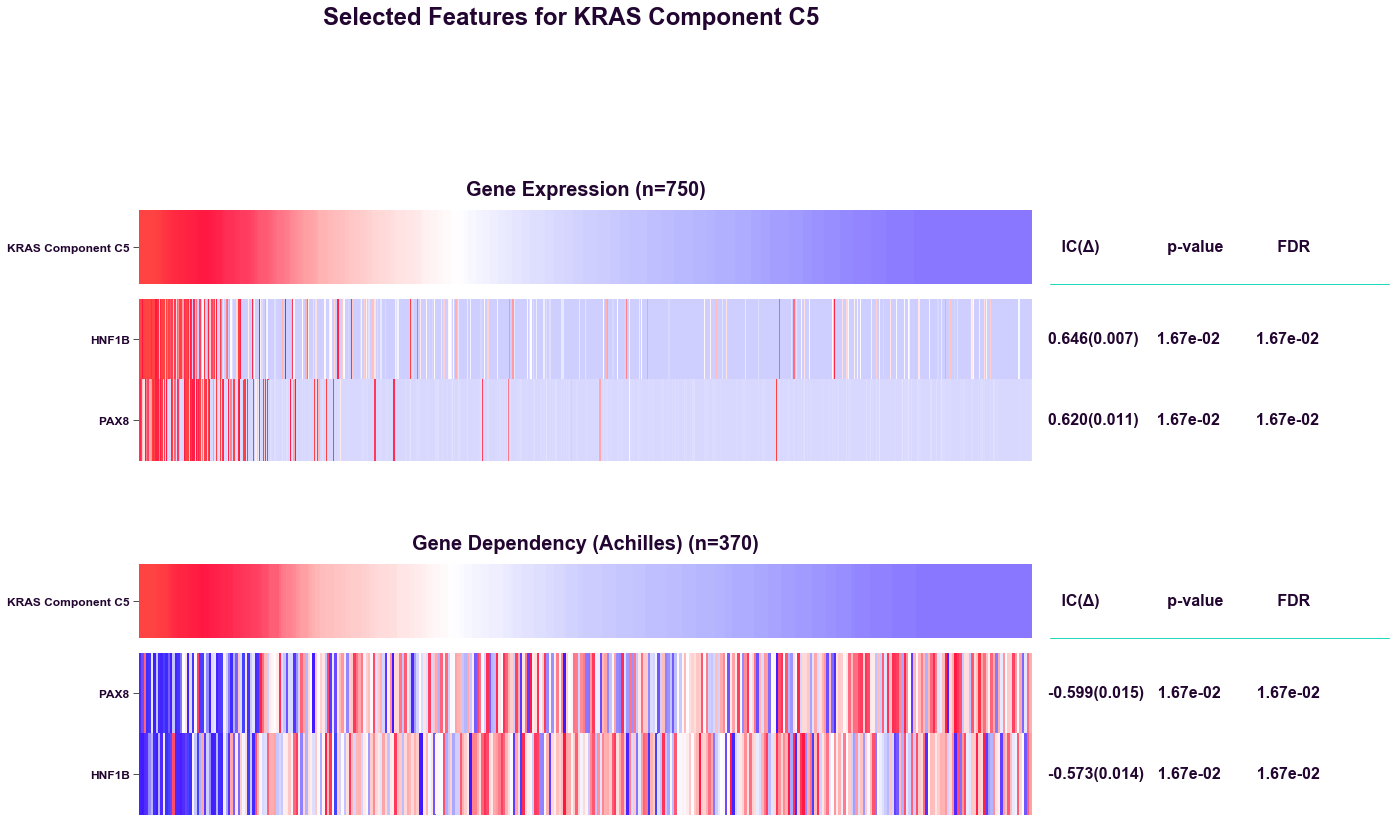

In [12]:
# Select component
component = 'C5'
target = h_matrix.loc[component, :]
target.name = 'KRAS Component {}'.format(component)

# Set up multiple features
CCLE['Gene Expression']['indices'] = ['PAX8', 'HNF1B']
CCLE['Gene Expression']['index_aliases'] = ['PAX8', 'HNF1B']

CCLE['Gene Dependency (Achilles)']['indices'] = ['PAX8', 'HNF1B']
CCLE['Gene Dependency (Achilles)']['index_aliases'] = ['PAX8', 'HNF1B']

multiple_features = OrderedDict(
    {k: CCLE[k]
     for k in ['Gene Expression', 'Gene Dependency (Achilles)']})

# Make summary match panel
ccal.make_summary_match_panel(
    target,
    multiple_features,
    title='Selected Features for {}'.format(target.name),
    file_path='../results/match_components/{}.summary_match_panel.png'.format(
        target.name))

### [Next chapter (5)](5 Define cellular states and make Onco-GPS map.ipynb)